In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
flower = sns.load_dataset("iris")
flower.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
flower.sample(20)

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
11,4.8,3.4,1.6,0.2,setosa
56,6.3,3.3,4.7,1.6,versicolor
86,6.7,3.1,4.7,1.5,versicolor
69,5.6,2.5,3.9,1.1,versicolor
4,5.0,3.6,1.4,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa
147,6.5,3.0,5.2,2.0,virginica
108,6.7,2.5,5.8,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica


In [5]:
flower.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
flower.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

<AxesSubplot: xlabel='species', ylabel='sepal_length'>

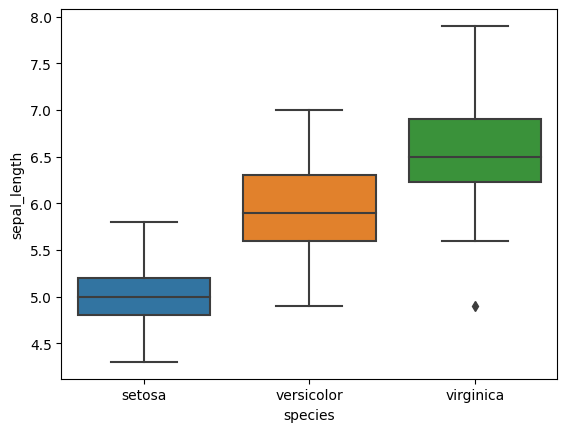

In [7]:
sns.boxplot(data=flower, x='species', y='sepal_length')

In [8]:
# for stats

import statsmodels.api as sm
from statsmodels.formula.api import ols



In [9]:
#Applying One way ANOVA

# tukey test
import pingouin as pg
anov = pg.anova(data=flower, dv='sepal_length', between='species')
print(anov)

    Source  ddof1  ddof2           F         p-unc       np2
0  species      2    147  119.264502  1.669669e-31  0.618706


#### Tukey HSD

In [10]:
# Tukey HSD
# Doing pairwise test

pw = pg.pairwise_tukey(data=flower, dv='sepal_length', between='species')
print(pw)


            A           B  mean(A)  mean(B)   diff        se          T  \
0      setosa  versicolor    5.006    5.936 -0.930  0.102958  -9.032819   
1      setosa   virginica    5.006    6.588 -1.582  0.102958 -15.365506   
2  versicolor   virginica    5.936    6.588 -0.652  0.102958  -6.332686   

        p-tukey    hedges  
0  2.420286e-14 -2.088053  
1  2.153833e-14 -3.053629  
2  8.287554e-09 -1.117195  


#### Doing bonferroni and sidak test

In [12]:
# Creating model

md = ols('sepal_length ~ species', data=flower).fit()
aov_table = sm.stats.anova_lm(md, type=2)
print(aov_table)

             df     sum_sq    mean_sq           F        PR(>F)
species     2.0  63.212133  31.606067  119.264502  1.669669e-31
Residual  147.0  38.956200   0.265008         NaN           NaN


In [15]:
# Pair wise test

pair_t = md.t_test_pairwise('species', method='bonferroni')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-bonferroni,reject-bonferroni
versicolor-setosa,0.930,0.102958,9.032819,8.770194e-16,0.726531,1.133469,2.631058e-15,True
virginica-setosa,1.582,0.102958,15.365506,2.214821e-32,1.378531,1.785469,6.644464e-32,True
virginica-versicolor,0.652,0.102958,6.332686,2.765638e-09,0.448531,0.855469,8.296915e-09,True
